<a href="https://colab.research.google.com/github/Manthanm9/User-Behavior-Analysis-in-a-Powerplay-s-Mobile-App/blob/main/PowerPlay_User_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

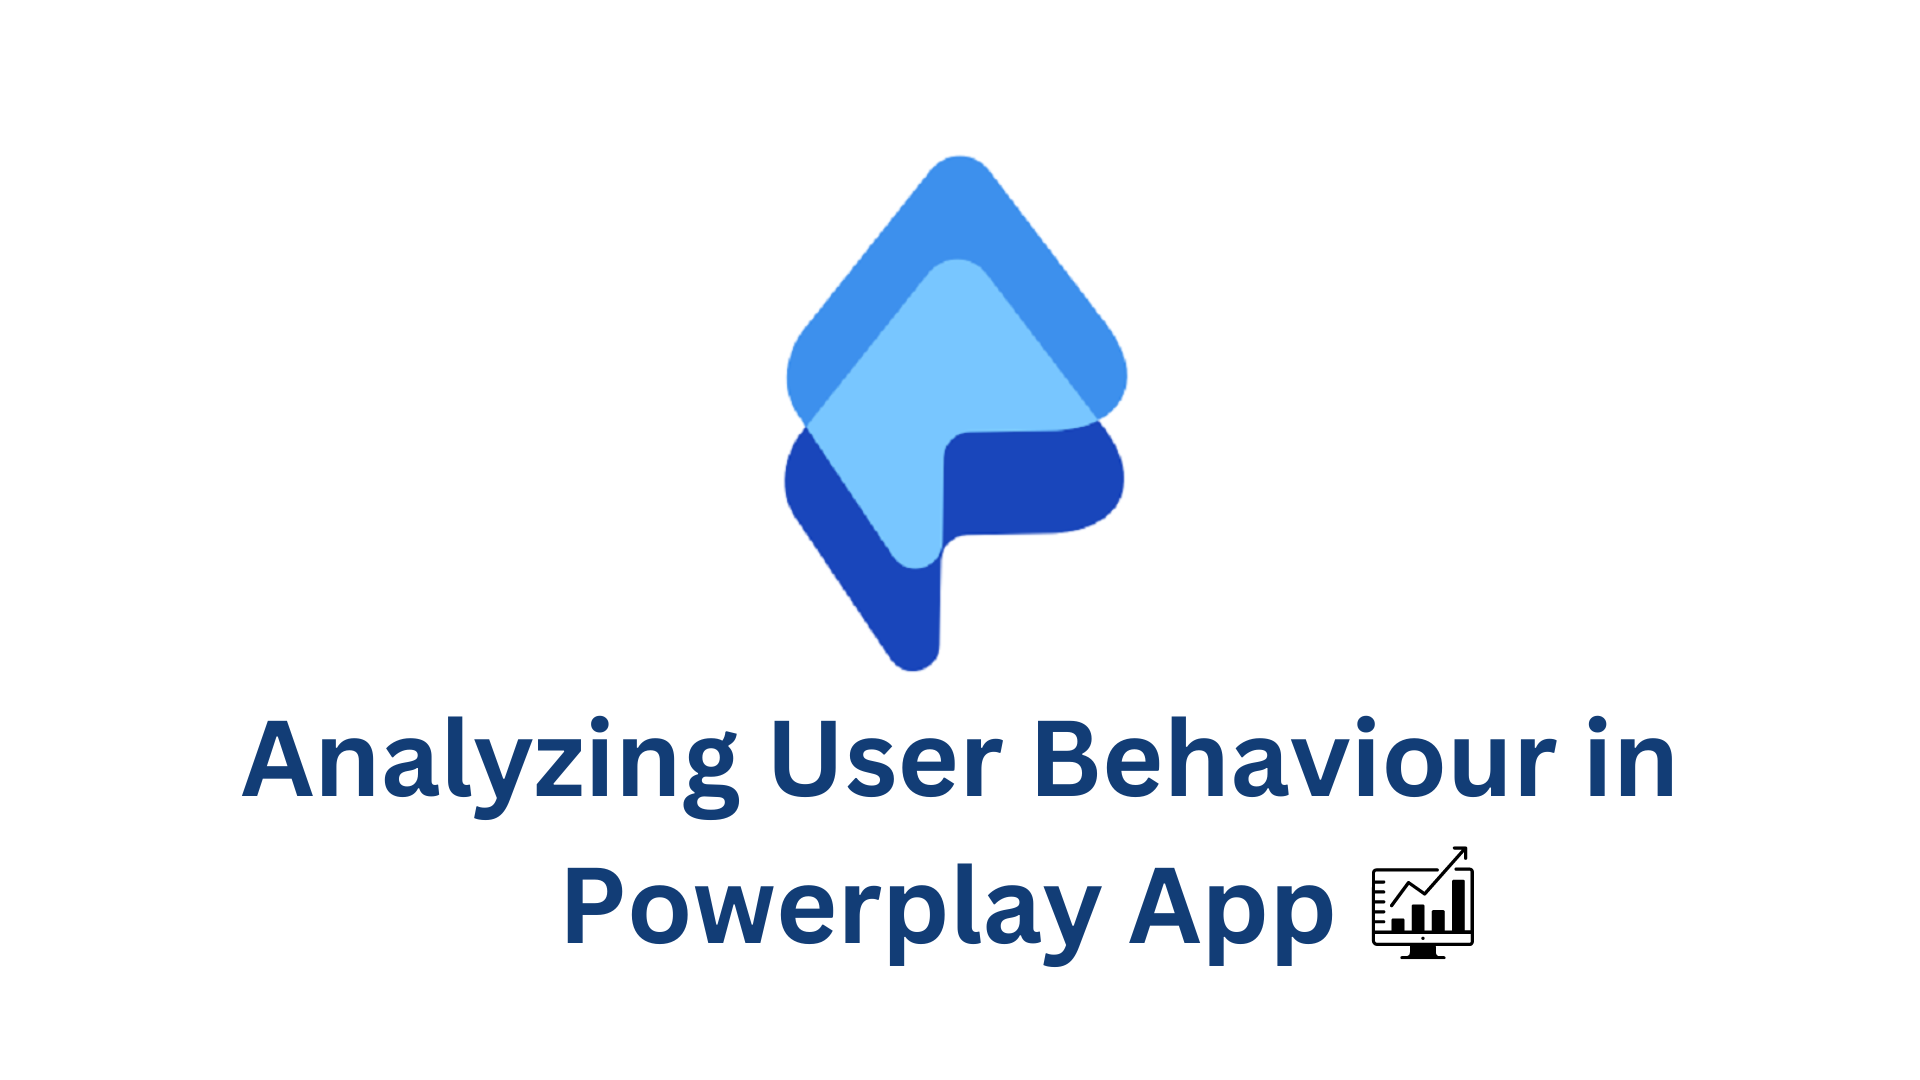

The Powerplay app, India's first of its kind, serves as a **"Slack for Construction Industry,"** aiming to revolutionize site-to-office collaboration. It replaces conventional communication methods like WhatsApp groups and registers, helping contractors enhance collaboration and reduce costs.

Importing dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Loading datasets

In [ ]:
event_description = pd.read_csv("Event Description Mapping.csv")
user_event = pd.read_csv("User - Event Raw Dataset.csv")

In [ ]:
user_event.head(10)

,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
5,2022-03-23 21:00:54,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
6,2022-03-22 20:40:20,task_creation,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
7,2022-03-23 21:03:27,stock_material_updated,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
8,2022-03-23 21:04:58,stock_material_updated,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
9,2022-03-23 21:05:14,stock_material_updated,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk


In [ ]:
event_description.head()

,Event,Description,Section
0,add_attendance_success,Successfully adding attendance of a person once,Labour
1,assigned_people_on_task,Assigned another person on a particular task,Task
2,attendance_list_accessed,Attendance list page opens on clicking this bu...,Labour
3,channel_message_sent,Message sent on chat feature,General
4,comment_create_success,Comment Created,General


## Data Cleaning and Exploration

Check for missing values

In [ ]:
user_event.isnull().sum()

created_at_time      0
event                0
org_id               0
project_id         141
user_id              0
dtype: int64

In [ ]:
user_event['project_id'].fillna('UNKNOWN', inplace=True)


In [ ]:
event_count = user_event["event"].value_counts()
sorted_event_count = event_count.sort_values(ascending=False)


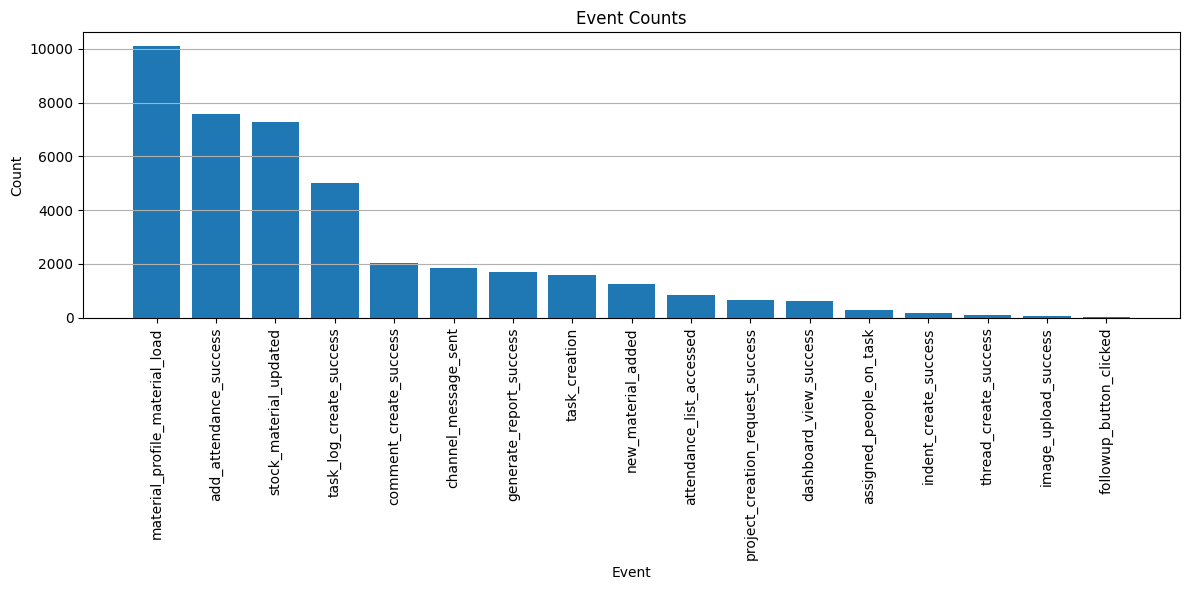

In [ ]:
# bar plot to visualize event counts
plt.figure(figsize=(12, 6))
plt.bar(sorted_event_count.index, sorted_event_count.values)
plt.xlabel("Event")
plt.ylabel("Count")
plt.title("Event Counts")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### User Engagement Analysis


In [ ]:
user_engagement_metrics = user_event.groupby("user_id")["event"].count()


In [ ]:
print("\nUser Engagement Metrics:")
print(user_engagement_metrics.describe())


User Engagement Metrics:
count     543.000000
mean       75.832413
std       460.995825
min         1.000000
25%         2.000000
50%         5.000000
75%        23.000000
max      9594.000000
Name: event, dtype: float64


In [ ]:
# User Segmentation based on User Engagement
user_engagement_bins = pd.qcut(user_engagement_metrics, q=3, labels=["low", "medium", "high"])


In [ ]:
# Count the number of users in each engagement segment
user_engagement_segment_counts = user_engagement_bins.value_counts()

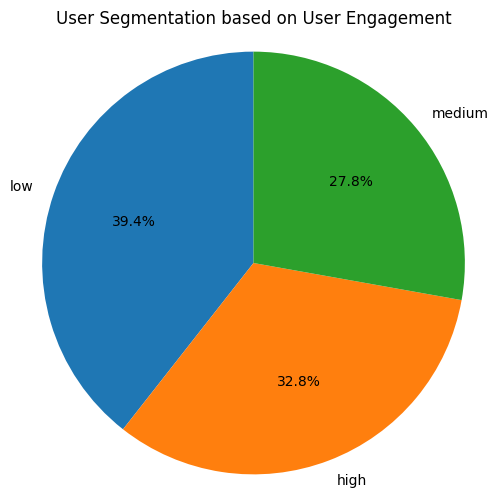

In [ ]:
# User Segmentation
plt.figure(figsize=(6, 6))
plt.pie(user_engagement_segment_counts, labels=user_engagement_segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("User Segmentation based on User Engagement")
plt.axis('equal')
plt.show()

### Identify Activation Triggers


In [ ]:
activation_triggers = user_event[user_event["event"] == "project_creation_request_success"]


In [ ]:
print("\nActivation Triggers:")
print(activation_triggers["event"].value_counts())



Activation Triggers:
project_creation_request_success    651
Name: event, dtype: int64


# Time-Based Analysis

In [ ]:
user_event["created_at_time"] = pd.to_datetime(user_event["created_at_time"])
user_event.set_index("created_at_time", inplace=True)


In [ ]:
# Daily event Count
daily_event_count = user_event.resample('D')["event"].count()


In [ ]:
# Monthly event count
monthly_event_count = user_event.resample('M')["event"].count()

In [ ]:
# User Engagement as per Time of Day
user_event["hour_of_day"] = user_event.index.hour
user_engagement_by_hour = user_event.groupby("hour_of_day")["event"].count()

## Daily Event Count

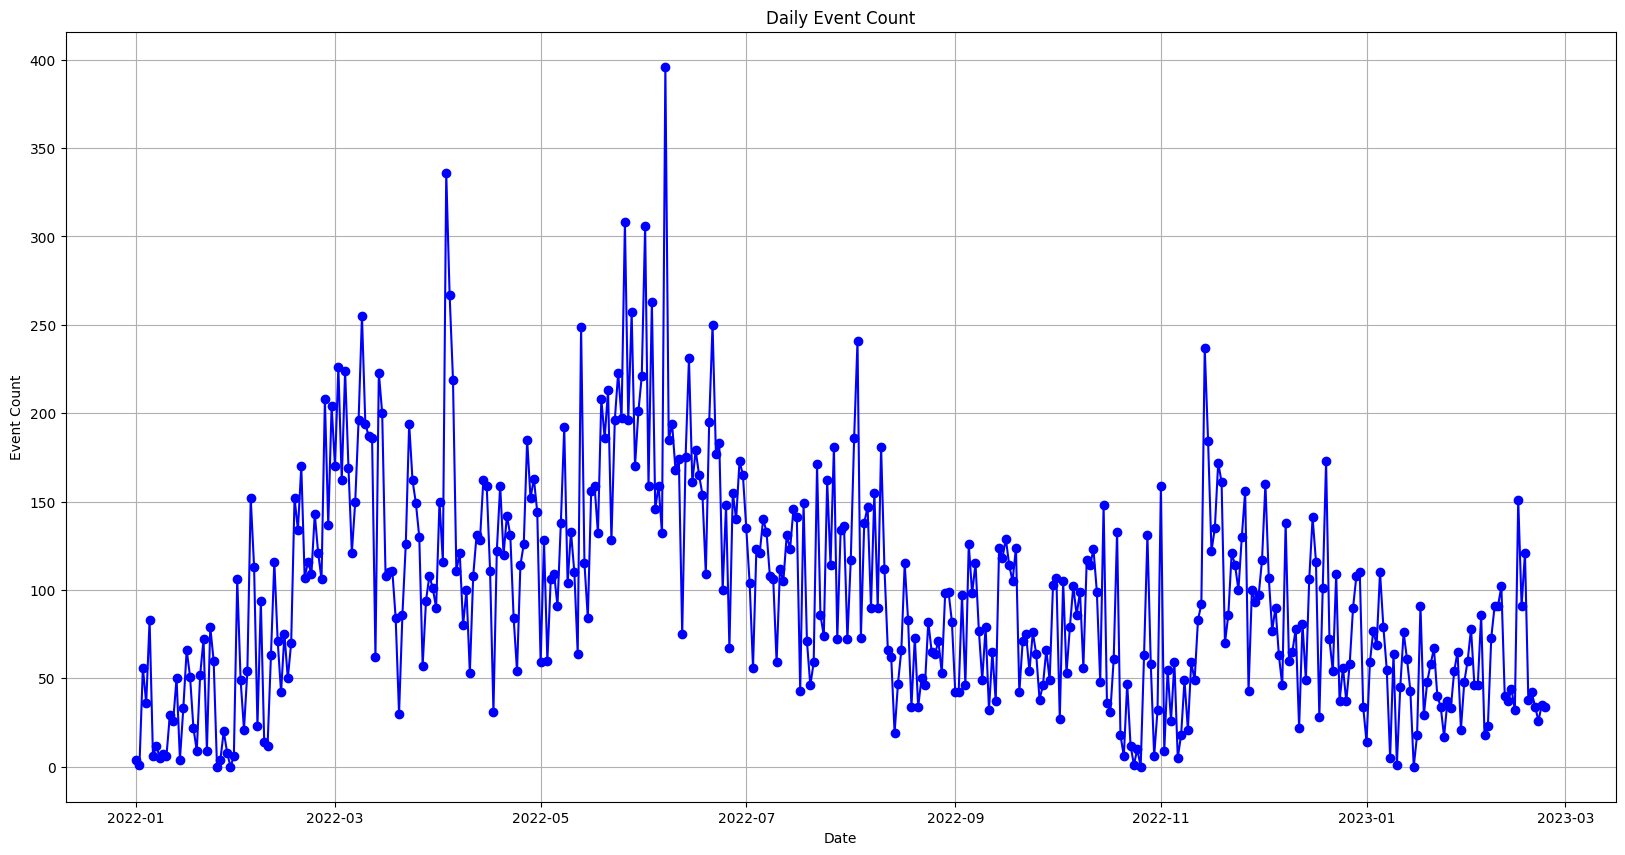

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(daily_event_count.index, daily_event_count.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.title("Daily Event Count")
plt.grid(True)
plt.show()


## Monthly Event Count

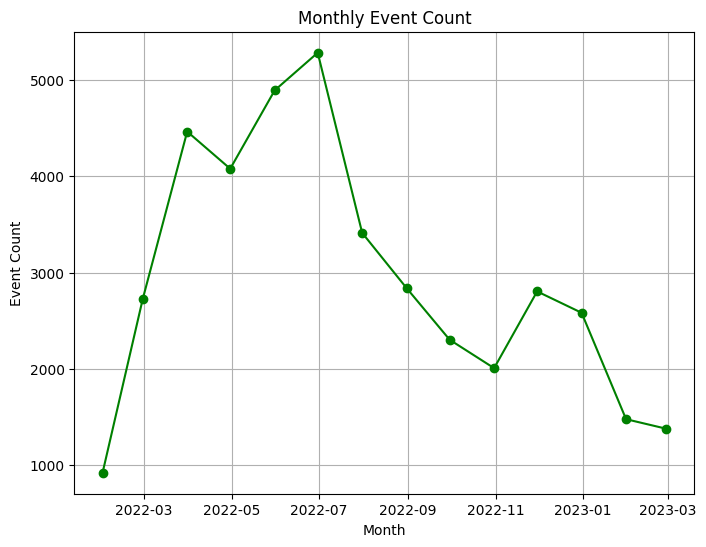

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(monthly_event_count.index, monthly_event_count.values, marker='o', linestyle='-', color='g')
plt.xlabel("Month")
plt.ylabel("Event Count")
plt.title("Monthly Event Count")
plt.grid(True)
plt.show()


**Monthly Event Counts:**

* User engagement shows fluctuations throughout the year based on the month.
* During February 2020, the engagement was below 1000 events, indicating relatively low activity during that period.
* March 2022 saw increased engagement, with approximately 2800 events.
* April 2022 experienced a significant rise in user engagement, with around 4500 events.
* Engagement remains relatively high during May and June 2022, with 4000 and 4900 events, respectively.
* July 2022 recorded the highest user engagement with approximately 5200 events.
* From August 2022 to October 2022, there was a gradual decline in engagement, with the number of events ranging from 2300 to 3400.
* The engagement increased slightly in November and December 2022, with around 2800 events.
* In early 2023, user engagement remained above 1000 events, indicating a relatively consistent level of activity.

**Seasonal Influence:**

The data suggests that the season might play a significant role in user engagement, particularly during the summer months. The peak engagement periods during summer support this hypothesis, likely due to increased construction activities during warmer weather.

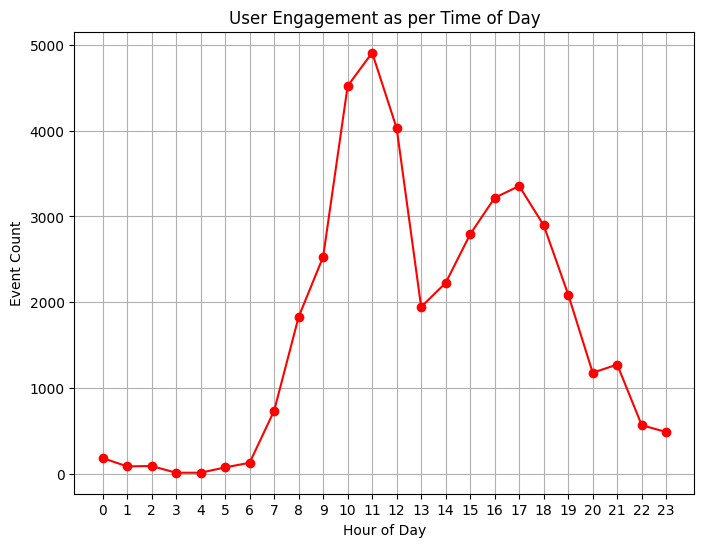

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(user_engagement_by_hour.index, user_engagement_by_hour.values, marker='o', linestyle='-', color='r')
plt.xlabel("Hour of Day")
plt.ylabel("Event Count")
plt.title("User Engagement as per Time of Day")
plt.grid(True)
plt.xticks(range(24))
plt.show()



**User Engagement by Hour:**

* User engagement is minimal during the early morning hours (before 6 am) and gradually increases as the day progresses.
* Engagement starts to pick up around 7 am, with around 800 events, and steadily rises during the morning hours.
* The highest user engagement occurs around 11 am, with approximately 4800 events, indicating a peak activity period during mid-morning.
* Engagement remains relatively high until the afternoon, with gradual declines in the number of events from 12 pm to 3 pm.
* User engagement starts to increase again around 3 pm and reaches another peak around 4 pm, with approximately 3200 events.
* Engagement gradually decreases in the evening hours, with around 600 events at 11 pm.





# Conclusion:
### Based on these findings, Powerplay can use this knowledge to optimize its app and engagement strategies:

1. Time-based Promotions: Powerplay can schedule promotions and notifications
during peak engagement hours to maximize user response and interaction.

2. Seasonal Features: Considering the seasonal influence, Powerplay can introduce features or promotions specific to the construction industry's needs during peak seasons to enhance user engagement.

3. Retention Strategies: Understanding the variations in user engagement over time can help Powerplay develop targeted retention strategies to keep users engaged throughout the year.

4. App Improvements: By analyzing the events during specific hours and months, Powerplay can identify areas where the app experience can be improved to cater to user preferences.

Overall, leveraging these insights can help Powerplay create a more engaging and user-friendly app, leading to increased user satisfaction and retention.